In [80]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt import get_config as get_fbipot_1d_config

from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot8Dims_T256_H05_tl_110data_StbleTgt import get_config as get_fbipot_8d_config

from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot12Dims_T256_H05_tl_110data_StbleTgt import get_config as get_fbipot_12d_config

from src.generative_modelling.models.TimeDependentScoreNetworks.ClassConditionalMarkovianTSPostMeanScoreMatching import \
    ConditionalMarkovianTSPostMeanScoreMatching
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
config = get_fbipot_1d_config()

fbipot_1d_scoreModel_best = ConditionalMarkovianTSPostMeanScoreMatching(
        *config.model_parameters)
rootdir = "/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/trained_models/"
modelname = config.scoreNet_trained_path.replace(rootdir, "")
for file in os.listdir(rootdir):
    if (modelname in file and "EENEp" not in file):
        fbipot_1d_scoreModel_best.load_state_dict(torch.load(rootdir+file))
        print(file.split("_")[-1])
fbipot_1d_scoreModel_best.eval()
fbipot_1d_scoreModel_curr = ConditionalMarkovianTSPostMeanScoreMatching(*config.model_parameters)
rootdir = "/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/snapshots/"
with open(config.scoreNet_trained_path.replace("/trained_models/", "/training_losses/") + "_loss", 'rb') as f:
        final_epoch = np.arange((np.array(pickle.load(f)).astype(float).shape[0]))[-1]
for file in os.listdir(rootdir):
    if modelname in file and "EENep" not in file:
        fbipot_1d_scoreModel_curr.load_state_dict(torch.load(rootdir+file, map_location=torch.device("cpu"))["MODEL_STATE"])
        print(final_epoch)
fbipot_1d_scoreModel_curr.eval()
print("Done 1D BiPot Loading\n")

NEp850
3459
Done 1D BiPot Loading



In [82]:
config = get_fbipot_8d_config()
fbipot_8d_scoreModel_best = ConditionalMarkovianTSPostMeanScoreMatching(
        *config.model_parameters)
rootdir = "/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/trained_models/"
modelname = config.scoreNet_trained_path.replace(rootdir, "")
for file in os.listdir(rootdir):
    if modelname in file:
        fbipot_8d_scoreModel_best.load_state_dict(torch.load(rootdir+file))
        print(file.split("_")[-1])
fbipot_8d_scoreModel_best.eval()
fbipot_8d_scoreModel_curr = ConditionalMarkovianTSPostMeanScoreMatching(*config.model_parameters)
rootdir = "/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/snapshots/"
with open(config.scoreNet_trained_path.replace("/trained_models/", "/training_losses/") + "_loss", 'rb') as f:
        final_epoch = np.arange((np.array(pickle.load(f)).astype(float).shape[0]))[-1]
for file in os.listdir(rootdir):
    if modelname in file:
        fbipot_8d_scoreModel_curr.load_state_dict(torch.load(rootdir+file, map_location=torch.device("cpu"))["MODEL_STATE"])
        print(final_epoch)
fbipot_8d_scoreModel_curr.eval()
print("Done 8D BiPot Loading\n")

NEp734
1631
Done 8D BiPot Loading



In [83]:
config = get_fbipot_12d_config()

fbipot_12d_scoreModel_best = ConditionalMarkovianTSPostMeanScoreMatching(
        *config.model_parameters)
rootdir = "/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/trained_models/"
modelname = config.scoreNet_trained_path.replace(rootdir, "")
for file in os.listdir(rootdir):
    if modelname in file:
        fbipot_12d_scoreModel_best.load_state_dict(torch.load(rootdir+file))
        print(file.split("_")[-1])
fbipot_12d_scoreModel_best.eval()
fbipot_12d_scoreModel_curr = ConditionalMarkovianTSPostMeanScoreMatching(*config.model_parameters)
rootdir = "/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/snapshots/"
with open(config.scoreNet_trained_path.replace("/trained_models/", "/training_losses/") + "_loss", 'rb') as f:
        final_epoch = np.arange((np.array(pickle.load(f)).astype(float).shape[0]))[-1]
for file in os.listdir(rootdir):
    if modelname in file:
        fbipot_12d_scoreModel_curr.load_state_dict(torch.load(rootdir+file, map_location=torch.device("cpu"))["MODEL_STATE"])
        print(final_epoch)
fbipot_12d_scoreModel_curr.eval()
print("Done 12D BiPot Loading\n")

NEp218
1273
Done 12D BiPot Loading



# Heatmap the Fourier Basis scales and logits for each dataset in best and current models

In [84]:
scales = np.zeros((6, 16))
scale_gates = np.zeros((6, 2*16))
titles = ["1D BiPot Best", "1D BiPot Curr", "8D BiPot Best", "8D BiPot Curr", "12D BiPot Best", "12D BiPot Curr"]

In [85]:
with torch.no_grad():
    i = 0
    for scoreModel in [fbipot_1d_scoreModel_best, fbipot_1d_scoreModel_curr, fbipot_8d_scoreModel_best, fbipot_8d_scoreModel_curr, fbipot_12d_scoreModel_best, fbipot_12d_scoreModel_curr]:
        scales[i, :] = ((scoreModel.mlp_state_mapper.hybrid.log_scale).numpy())
        scale_gates[i, :] = torch.sigmoid(scoreModel.mlp_state_mapper.hybrid.gate_logits / 1.).numpy()
        i+=1

Text(0.5, 23.52222222222222, 'Fourier Frequency Index')

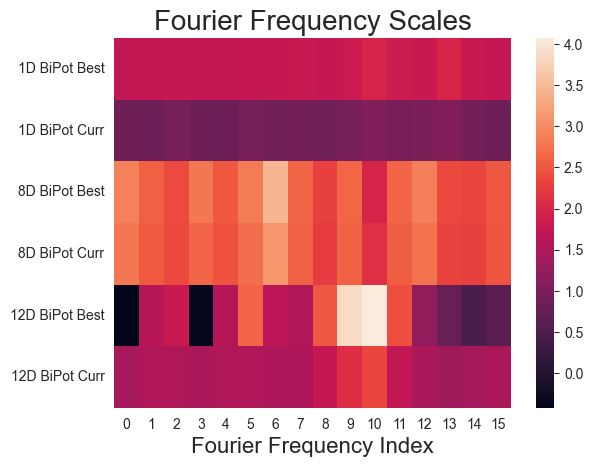

In [86]:
sns.heatmap(scales, yticklabels=titles)
plt.title("Fourier Frequency Scales", fontsize=20)
plt.xlabel("Fourier Frequency Index", fontsize=16)

In [87]:
print(np.mean(scales, axis=1))
print(np.std(scales, axis=1))

[1.79418961 0.91671525 2.59713481 2.5247467  1.62191981 1.60013653]
[0.07702729 0.07354734 0.32501377 0.23420986 1.24234622 0.25716349]


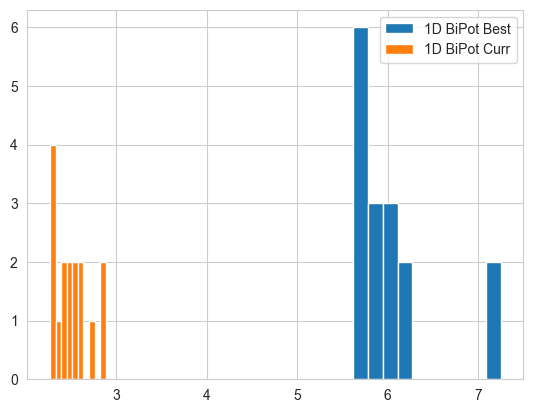

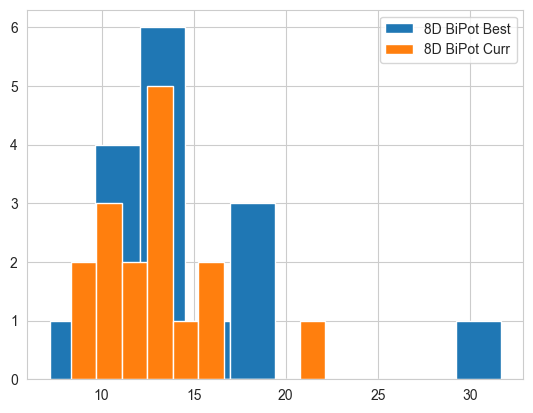

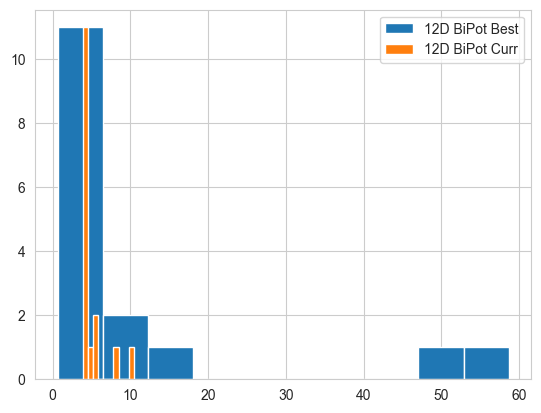

In [98]:
for i in range(3):
    if i == 0:
        plt.hist(np.exp(scales[0, :]), label=titles[0])
        plt.hist(np.exp(scales[1, :]), label=titles[1])
    elif i == 1:
        plt.hist(np.exp(scales[2, :]), label=titles[2])
        plt.hist(np.exp(scales[3, :]), label=titles[3])
    else:
        plt.hist(np.exp(scales[4, :]), label=titles[4])
        plt.hist(np.exp(scales[5, :]), label=titles[5])
    plt.legend()
    plt.show()
    plt.close()


### For all models, we observe a decrease in log-scales towards their bias of 0. Also note that the difference in training epoch between best and current is large in all cases. For D=8, we do not observe signifcant change in the log-scales in absolute terms. For D=12, we observe the log scales become more uniform, with a slightly lower mean value. However, in all cases, the absolute shift in log scales is not large. Even more puzzling, the relative difference is lowest for the D=12 case, which is the only one which observes increasing OOS drift track error! The main difference between the models is that the variance does change significantly for D=12.

Text(0.5, 23.52222222222222, 'Fourier Basis Index')

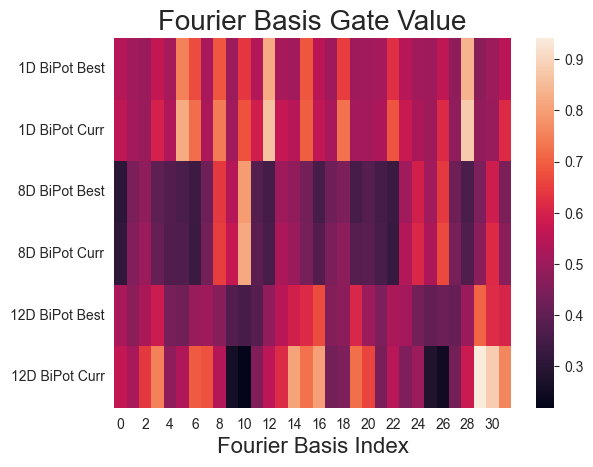

In [88]:
sns.heatmap(scale_gates, yticklabels=titles)
plt.title("Fourier Basis Gate Value", fontsize=20)
plt.xlabel("Fourier Basis Index", fontsize=16)

In [89]:
print(np.mean(scale_gates, axis=1))
print(np.std(scale_gates, axis=1))

[0.57154592 0.59924607 0.4507274  0.46478347 0.50271299 0.5674312 ]
[0.0954872  0.1111203  0.10820002 0.11340391 0.0861052  0.17870669]


### In all cases, the average gating value increases, with the absolute difference largest for the D=12 case. The variance of these values also increases in every case, again most significantly for the D=12 case. Compared to the DLnz datasets, where we see that none of the higher dimensional cases converge, the D=12 case here is the only one which has convergece issues, eventhough the D=8 case also brings performance issues, i.e., the final converged behaviour is sub-optimal compared to the IID Nadaraya estimator.

# Heatmap the weight matrix for the first time we process the combined features

In [90]:
mlp_linear2_weight = np.zeros((6, 2*16 + 4 + 12, 4))

In [91]:
with torch.no_grad():
    i = 0
    for scoreModel in [fbipot_1d_scoreModel_best, fbipot_1d_scoreModel_curr, fbipot_8d_scoreModel_best, fbipot_8d_scoreModel_curr, fbipot_12d_scoreModel_best, fbipot_12d_scoreModel_curr]:
        if i == 0 or i == 1:
            mlp_linear2_weight[i, (12-1):, :] = (scoreModel.mlp_state_mapper.linear2.weight).numpy().T
        elif i == 2 or i ==3:
            mlp_linear2_weight[i, (12-8):, :] = (scoreModel.mlp_state_mapper.linear2.weight).numpy().T
        else:
            mlp_linear2_weight[i, :, :] = (scoreModel.mlp_state_mapper.linear2.weight).numpy().T
        i += 1

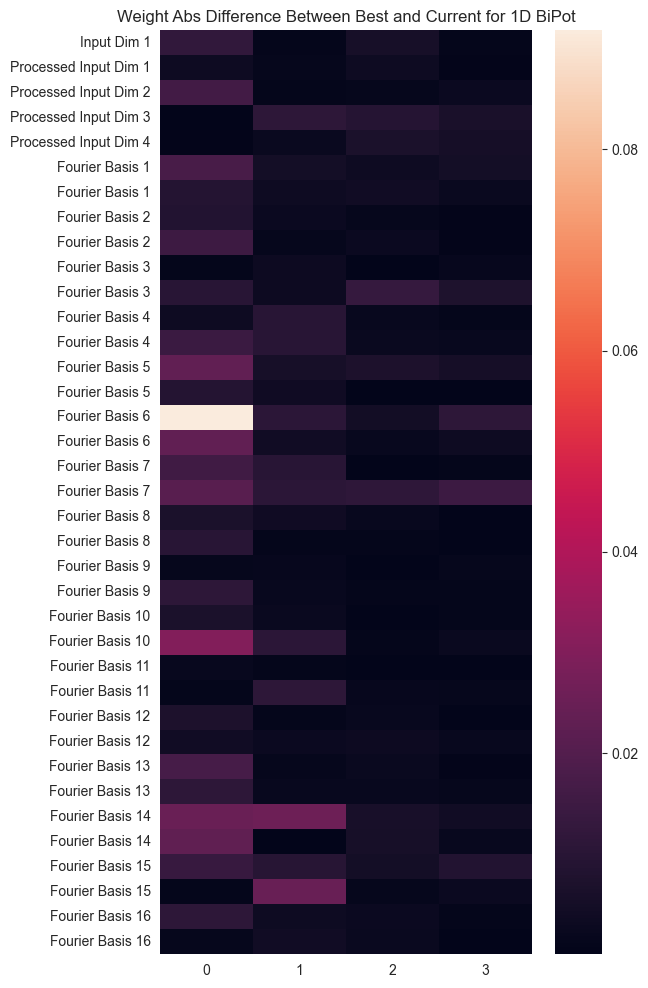

['Fourier Basis 6', 'Fourier Basis 14', 'Fourier Basis 7', 'Fourier Basis 10', 'Fourier Basis 5', 'Fourier Basis 15', 'Fourier Basis 3', 'Fourier Basis 6', 'Fourier Basis 14', 'Fourier Basis 1', 'Fourier Basis 15', 'Fourier Basis 4', 'Processed Input Dim 3', 'Fourier Basis 7', 'Fourier Basis 13', 'Processed Input Dim 2', 'Input Dim 1', 'Fourier Basis 2', 'Fourier Basis 1', 'Fourier Basis 16', 'Fourier Basis 4', 'Fourier Basis 13', 'Processed Input Dim 4', 'Fourier Basis 9', 'Fourier Basis 11', 'Fourier Basis 2', 'Fourier Basis 5', 'Fourier Basis 8', 'Fourier Basis 8', 'Fourier Basis 12', 'Fourier Basis 10', 'Fourier Basis 12', 'Processed Input Dim 1', 'Fourier Basis 16', 'Fourier Basis 3', 'Fourier Basis 9', 'Fourier Basis 11']
['Fourier Basis 6', 'Fourier Basis 10', 'Fourier Basis 14', 'Fourier Basis 15', 'Fourier Basis 14', 'Fourier Basis 6', 'Fourier Basis 5', 'Fourier Basis 13', 'Fourier Basis 7', 'Processed Input Dim 2', 'Fourier Basis 2', 'Fourier Basis 1', 'Fourier Basis 4', 'In

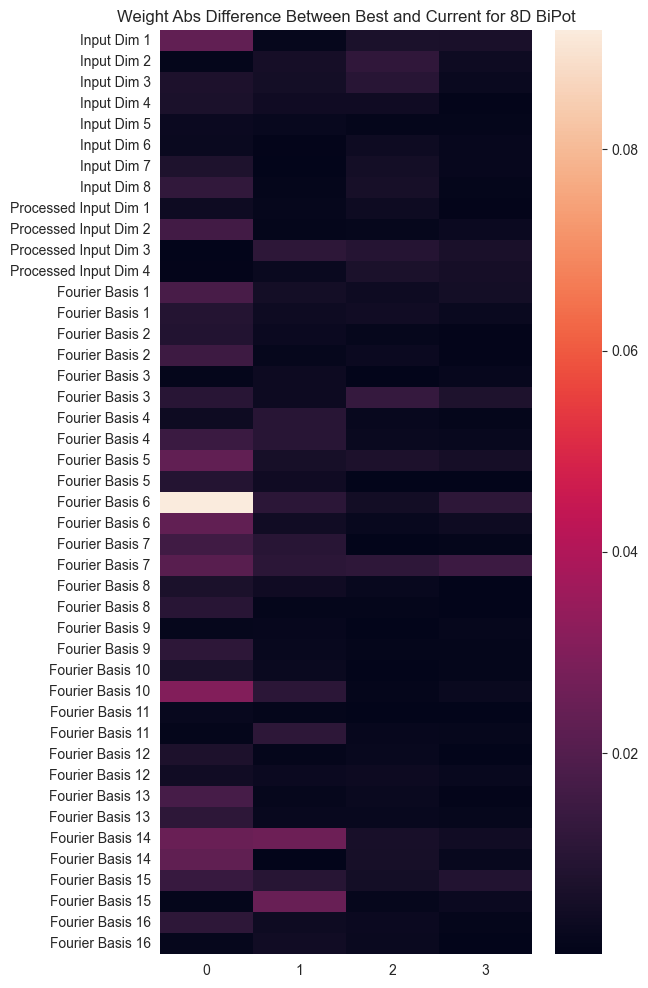

['Fourier Basis 6', 'Fourier Basis 14', 'Fourier Basis 7', 'Fourier Basis 10', 'Fourier Basis 5', 'Input Dim 1', 'Fourier Basis 15', 'Fourier Basis 3', 'Fourier Basis 6', 'Fourier Basis 14', 'Fourier Basis 1', 'Fourier Basis 15', 'Fourier Basis 4', 'Processed Input Dim 3', 'Fourier Basis 7', 'Input Dim 3', 'Fourier Basis 13', 'Input Dim 2', 'Processed Input Dim 2', 'Input Dim 8', 'Fourier Basis 2', 'Fourier Basis 1', 'Fourier Basis 16', 'Fourier Basis 4', 'Fourier Basis 13', 'Processed Input Dim 4', 'Input Dim 4', 'Fourier Basis 9', 'Fourier Basis 11', 'Input Dim 7', 'Fourier Basis 2', 'Fourier Basis 5', 'Fourier Basis 8', 'Fourier Basis 8', 'Fourier Basis 12', 'Fourier Basis 10', 'Fourier Basis 12', 'Processed Input Dim 1', 'Fourier Basis 16', 'Input Dim 6', 'Input Dim 5', 'Fourier Basis 3', 'Fourier Basis 9', 'Fourier Basis 11']
['Fourier Basis 6', 'Fourier Basis 10', 'Fourier Basis 14', 'Fourier Basis 15', 'Fourier Basis 14', 'Fourier Basis 6', 'Input Dim 1', 'Fourier Basis 5', 'Fou

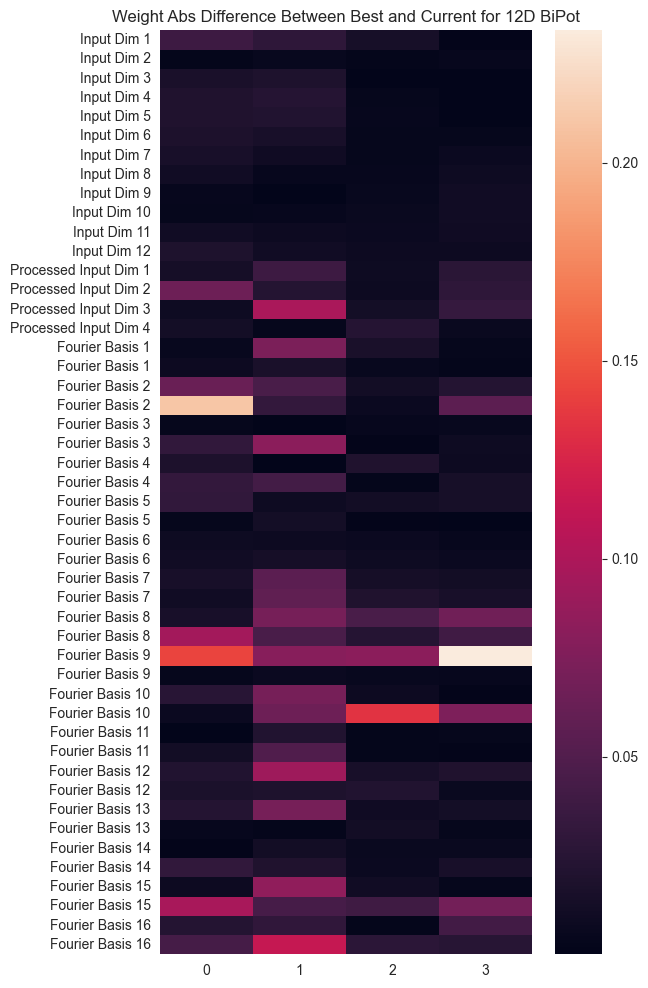

['Fourier Basis 9', 'Fourier Basis 2', 'Fourier Basis 10', 'Fourier Basis 15', 'Fourier Basis 16', 'Fourier Basis 8', 'Fourier Basis 8', 'Processed Input Dim 3', 'Fourier Basis 12', 'Fourier Basis 2', 'Processed Input Dim 2', 'Fourier Basis 3', 'Fourier Basis 13', 'Fourier Basis 15', 'Fourier Basis 10', 'Fourier Basis 7', 'Fourier Basis 1', 'Fourier Basis 16', 'Fourier Basis 7', 'Fourier Basis 4', 'Processed Input Dim 1', 'Input Dim 1', 'Fourier Basis 14', 'Fourier Basis 5', 'Fourier Basis 11', 'Fourier Basis 12', 'Fourier Basis 4', 'Input Dim 4', 'Input Dim 5', 'Input Dim 12', 'Processed Input Dim 4', 'Input Dim 6', 'Fourier Basis 6', 'Input Dim 3', 'Input Dim 7', 'Input Dim 11', 'Fourier Basis 1', 'Fourier Basis 6', 'Input Dim 8', 'Fourier Basis 11', 'Fourier Basis 14', 'Input Dim 10', 'Fourier Basis 13', 'Input Dim 9', 'Fourier Basis 9', 'Fourier Basis 5', 'Input Dim 2', 'Fourier Basis 3']
['Fourier Basis 2', 'Fourier Basis 9', 'Fourier Basis 10', 'Fourier Basis 16', 'Processed Inpu

In [95]:
for i in range(3):
    if i == 0:
        plt.figure(figsize=(6, 12))  # Increase height
        yticklabels = [[f"Input Dim {k}" for k in range(1, 1+1)]]
        yticklabels.append([f"Processed Input Dim {k}" for k in range(1, 5)])
        yticklabels.append([f"Fourier Basis {k//2 + 1}" for k in range(2*16)])
        yticklabels = [item for sublist in yticklabels for item in sublist]
        abs_diff = np.abs(mlp_linear2_weight[2, (12-1):, :]-mlp_linear2_weight[3, (12-1):, :])
        sns.heatmap(abs_diff, yticklabels=yticklabels)
        plt.title("Weight Abs Difference Between Best and Current for 1D BiPot")
    elif i == 1:
        plt.figure(figsize=(6, 12))  # Increase height
        yticklabels = [[f"Input Dim {k}" for k in range(1, 8+1)]]
        yticklabels.append([f"Processed Input Dim {k}" for k in range(1, 5)])
        yticklabels.append([f"Fourier Basis {k//2 + 1}" for k in range(2*16)])
        yticklabels = [item for sublist in yticklabels for item in sublist]
        abs_diff = np.abs(mlp_linear2_weight[2, (12-8):, :]-mlp_linear2_weight[3, (12-8):, :])
        sns.heatmap(abs_diff, yticklabels=yticklabels)
        plt.title("Weight Abs Difference Between Best and Current for 8D BiPot")

    else:
        plt.figure(figsize=(6, 12))  # Increase height
        yticklabels = [[f"Input Dim {k}" for k in range(1, 12+1)]]
        yticklabels.append([f"Processed Input Dim {k}" for k in range(1, 5)])
        yticklabels.append([f"Fourier Basis {k//2 + 1}" for k in range(2*16)])
        yticklabels = [item for sublist in yticklabels for item in sublist]
        abs_diff = np.abs(mlp_linear2_weight[4, :, :]-mlp_linear2_weight[5, :, :])
        sns.heatmap(abs_diff, yticklabels=yticklabels)
        plt.title("Weight Abs Difference Between Best and Current for 12D BiPot")
    plt.show()
    plt.close()
    print([item for _, item in sorted(zip(np.mean(abs_diff, axis=1), yticklabels), reverse=True)])
    print([item for _, item in sorted(zip(np.std(abs_diff, axis=1), yticklabels), reverse=True)])